In [1]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
from matplotlib.animation import FuncAnimation as Animate

In [2]:
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    @property
    def asList(self):
        return [self.x, self.y]

In [3]:
class Box(object):
    def __init__(self, 
                 pt=None,
                 array=None):
        
        try:
            self.array = np.array([pt[0].asList,
                                   pt[1].asList,
                                   pt[2].asList,
                                   pt[3].asList,
                                   pt[0].asList])
        except TypeError:
            self.array = array
        except AttributeError:
            self.array = array
    
    def rotate(self, theta):
        # The following is the rotation matrix
        R = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta),  np.cos(theta)]])
        # @ is matrix multiplication
        rot = R @ self.array.T

        # returns a NEW Box object.
        # doesn't change the original box
        return Box(array=rot.T)
    
    def deform(self, F):
        deformedBox = F @ self.array.T
        return Box(array=deformedBox.T)
        
    def plot(self):
        ln1 = ax.plot(self.array[:,0], self.array[:,1],'k')
        ln2 = ax.scatter(self.array[:,0], self.array[:,1],color='k')
        return (ln1, ln2)
    
    @property
    def xdata(self):
        return self.array[:,0]
    
    @property
    def ydata(self):
        return self.array[:,1]
    
    @property
    def data(self):
        return (self.xdata, self.ydata)

In [4]:
pt0 = Point(0, 0)
pt1 = Point(1, 0)
pt2 = Point(1, 1)
pt3 = Point(0, 1)
box0 = Box([pt0, pt1, pt2, pt3])
F = np.array([[1.1,0.1],[0,1.1]])

([<matplotlib.lines.Line2D object at 0x7ff6acee1e10>], <matplotlib.collections.PathCollection object at 0x7ff6aceef828>)


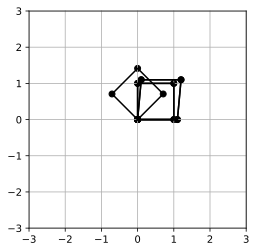

In [5]:
fig, ax = plt.subplots()
# plot original box

box0.plot()
box0.rotate(np.pi/4).plot()

box0.deform(F).plot()
box0.rotate(0).deform(F).plot()

ax.grid(True)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_aspect('equal')
print(box0.plot())
#for theta in np.linspace(0, 2*np.pi, 10):
#    box0.rotate(theta).plot(ax)

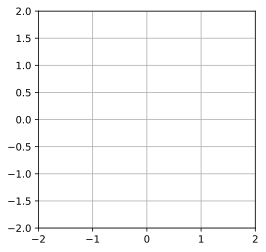

In [6]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_aspect('equal','box')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

line1, = ax.plot([], [], 'k-o')
line2, = ax.plot([], [], 'r-o')

def init():
    xdata, ydata = box0.data
    line1.set_data(xdata, ydata)
    
    xdata, ydata = box0.deform(F).data
    line2.set_data(xdata, ydata)
    return line1, line2

def update(frame):
    xdata, ydata = box0.rotate(frame).data
    line1.set_data(xdata, ydata)
    
    xdata, ydata = box0.rotate(frame).deform(F).data
    line2.set_data(xdata, ydata)
    return line1, line2

nframes = 100
tf = 5
interval = (tf*1000)/(nframes-1)

frames = np.linspace(0, 2*np.pi, nframes)


ani = Animate(fig,
              update,
              init_func=init,
              frames=frames,
              interval=interval,
              blit=True
             )

HTML(ani.to_jshtml())

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

#=========================================
# Create Fake Images using Numpy 
# You don't need this in your code as you have your own imageList.
# This is used as an example.

imageList = []
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    imageList.append(np.sin(x) + np.cos(y))

#=========================================
# Animate Fake Images (in Jupyter)

def getImageFromList(x):
    return imageList[x]

In [8]:
fig = plt.figure(figsize=(5, 5))
ims = []
for i in range(len(imageList)):
    im = plt.imshow(getImageFromList(i), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())

#=========================================
# Save animation as video (if required)
# ani.save('dynamic_images.mp4')

In [9]:
HTML(ani.to_jshtml())